<a href="https://colab.research.google.com/github/Yug-Oswal/Yug/blob/main/CatvDogUsingTL(InceptionV3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-06-24 12:34:29--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.196.128, 173.194.197.128, 64.233.191.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.196.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   188MB/s    in 0.4s    

2023-06-24 12:34:29 (188 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [17]:
# Instantiating the pre-trained model, Inception V3 - without classification layer (fully-connected layer)
import tensorflow as tf

pre_trained_model = tf.keras.applications.InceptionV3(input_shape = (150, 150, 3),
                                                      include_top = False,
                                                      weights = None)

In [18]:
# Checking the last layers to determine output layer
for layer in pre_trained_model.layers[200:]:
  print(f"{layer.name}: {layer.output_shape}")

conv2d_253: (None, 7, 7, 192)
batch_normalization_253: (None, 7, 7, 192)
activation_253: (None, 7, 7, 192)
conv2d_249: (None, 7, 7, 192)
conv2d_254: (None, 7, 7, 192)
batch_normalization_249: (None, 7, 7, 192)
batch_normalization_254: (None, 7, 7, 192)
activation_249: (None, 7, 7, 192)
activation_254: (None, 7, 7, 192)
conv2d_250: (None, 7, 7, 192)
conv2d_255: (None, 7, 7, 192)
batch_normalization_250: (None, 7, 7, 192)
batch_normalization_255: (None, 7, 7, 192)
activation_250: (None, 7, 7, 192)
activation_255: (None, 7, 7, 192)
average_pooling2d_24: (None, 7, 7, 768)
conv2d_248: (None, 7, 7, 192)
conv2d_251: (None, 7, 7, 192)
conv2d_256: (None, 7, 7, 192)
conv2d_257: (None, 7, 7, 192)
batch_normalization_248: (None, 7, 7, 192)
batch_normalization_251: (None, 7, 7, 192)
batch_normalization_256: (None, 7, 7, 192)
batch_normalization_257: (None, 7, 7, 192)
activation_248: (None, 7, 7, 192)
activation_251: (None, 7, 7, 192)
activation_256: (None, 7, 7, 192)
activation_257: (None, 7, 7, 19

In [19]:
# Checking model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_188 (Batch  (None, 74, 74, 32)  96          ['conv2d_188[0][0]']             
 Normalization)                                                                                   
                                                                                       

In [20]:
# Loading pre-trained weights
local_weights = "/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

pre_trained_model.load_weights(local_weights)

# Freezing layers in the model; No fine-tuning
for layer in pre_trained_model.layers:
  layer.trainable = False

In [31]:
# Choosing our last output layer
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

# Attaching classification layer on the last_output layer
# First, Flattening the layer
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
# Adding dropout for regularization
x = tf.keras.layers.Dropout(0.2)(x)
# Classification layer
output = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

# Defining our model
model = tf.keras.models.Model(inputs = pre_trained_model.input, outputs = output)

In [32]:
# Visualising the self-attached classification layer
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_188 (Batch  (None, 74, 74, 32)  96          ['conv2d_188[0][0]']             
 Normalization)                                                                                   
                                                                                            

In [33]:
# Setting training params
model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [28]:
# Downloading cats and dogs dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-06-24 13:16:14--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   102MB/s    in 0.6s    

2023-06-24 13:16:15 (102 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [34]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Define our example directories and files
base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Validation Data Generator
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (150, 150))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary',
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [35]:
# Training the model
history = model.fit(train_generator,
                    steps_per_epoch = 100,
                    epochs = 20,
                    validation_data = validation_generator,
                    validation_steps = 50,
                    verbose = 1)

Epoch 1/20
100/100 [==============================] - 43s 309ms/step - loss: 1.0146 - accuracy: 0.8325 - val_loss: 0.5383 - val_accuracy: 0.8470
Epoch 2/20
100/100 [==============================] - 20s 199ms/step - loss: 0.2641 - accuracy: 0.8880 - val_loss: 0.1795 - val_accuracy: 0.9380
Epoch 3/20
100/100 [==============================] - 29s 293ms/step - loss: 0.2180 - accuracy: 0.9180 - val_loss: 0.1038 - val_accuracy: 0.9640
Epoch 4/20
100/100 [==============================] - 23s 230ms/step - loss: 0.2101 - accuracy: 0.9220 - val_loss: 0.1423 - val_accuracy: 0.9530
Epoch 5/20
100/100 [==============================] - 39s 389ms/step - loss: 0.2126 - accuracy: 0.9275 - val_loss: 0.1043 - val_accuracy: 0.9630
Epoch 6/20
100/100 [==============================] - 26s 265ms/step - loss: 0.1790 - accuracy: 0.9330 - val_loss: 0.1031 - val_accuracy: 0.9610
Epoch 7/20
100/100 [==============================] - 31s 308ms/step - loss: 0.1717 - accuracy: 0.9325 - val_loss: 0.1307 - val_ac

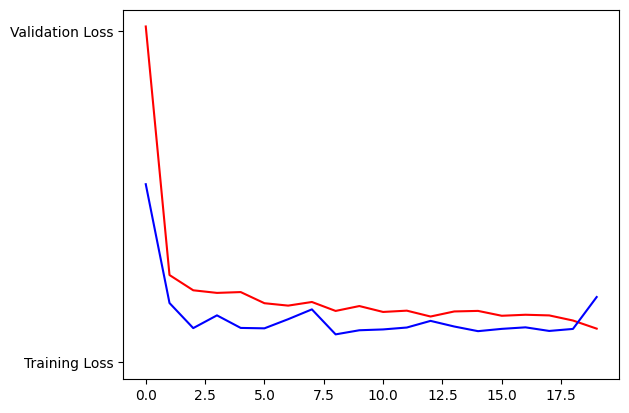

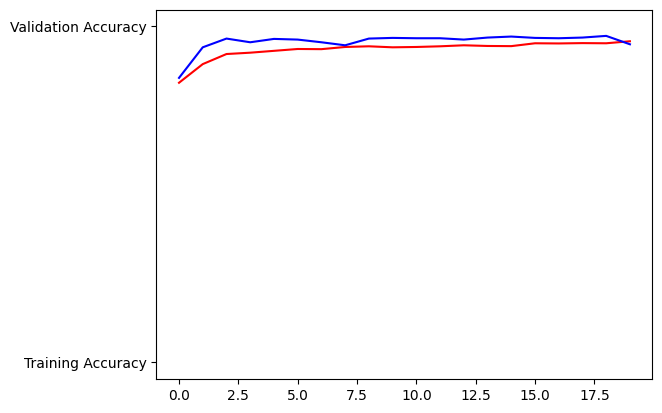

In [37]:
# Visualising the training and validation losses and accuracy
import matplotlib.pyplot as plt

hist = history.history

loss = hist['loss']
val_loss = hist['val_loss']
acc = hist['accuracy']
val_acc = hist['val_accuracy']
epochs = range(len(loss))

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.show()

In [39]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

Saving puppy-ga9e0eb295_640.jpg to puppy-ga9e0eb295_640.jpg
1/1 [==============================] - 2s 2s/step
puppy-ga9e0eb295_640.jpg is a dog.


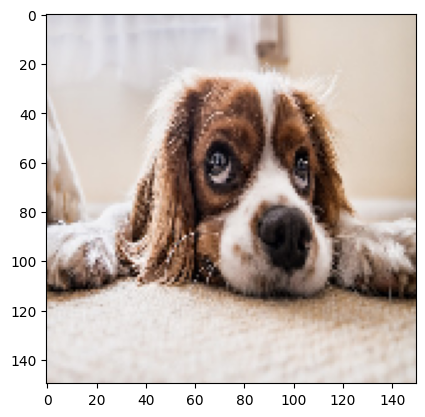

In [40]:
# ----------------------------------- #
# Predicting tough to classify images #
# ----------------------------------- #

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

uploaded = files.upload()
for fname in uploaded.keys():
  path = '/content/' + fname

  img = load_img(path, target_size = (150, 150))
  plt.imshow(img)
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis = 0)

  output = model.predict(x)

  if (output[0] > 0.5):
    print(f"{fname} is a dog.")
  else:
    print(f"{fname} is a cat.")